<a href="https://colab.research.google.com/github/Srishtik-ui/Traning_program_of_ml-colud_security/blob/main/Day_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Build a predictive model and predict the sales of each product at a particular outlet

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# load the data
raw_data=pd.read_csv('/content/train.csv')

# number of datapoints andd features
raw_data.shape

# how the data looks like
raw_data.head()

# check general info and dtypes
raw_data.info()

# get statistics from the data
raw_data.describe(include='all')

#verify null values
raw_data.isna().sum()

#check for duplicated rows
raw_data.duplicated().any()

# verify unique values
raw_data.apply(lambda x: len(x.unique()))

# getting categorical and numerical columns
cat_cols= raw_data.select_dtypes(exclude='number').columns.to_list()
num_cols= raw_data.select_dtypes(include='number').columns.to_list()
print('categorical columns:', cat_cols)
print('numerical columns:', num_cols)

# exploring categories
for col in cat_cols:
    print('--------------------------')
    print('series', col)
    print('---------------------------')
    print(raw_data[col].value_counts())
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
categorical columns: ['Item_Identifier', 'Ite

In [ ]:
import pandas as pd

student_data=pd.read_csv('/content/student-data.csv')

cat_cols= student_data.select_dtypes(exclude='number').columns.to_list()
num_cols= student_data.select_dtypes(include='number').columns.to_list()
print('categorical columns:', cat_cols)
print('numerical columns:', num_cols)

# exploring categories
for col in cat_cols:
    print('--------------------------')
    print('series', col)
    print('---------------------------')
    print(student_data[col].value_counts())
    print('\n')

categorical columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'passed']
numerical columns: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
--------------------------
series school
---------------------------
school
GP    349
MS     46
Name: count, dtype: int64


--------------------------
series sex
---------------------------
sex
F    208
M    187
Name: count, dtype: int64


--------------------------
series address
---------------------------
address
U    307
R     88
Name: count, dtype: int64


--------------------------
series famsize
---------------------------
famsize
GT3    281
LE3    114
Name: count, dtype: int64


--------------------------
series Pstatus
---------------------------
Pstatus
T    354
A     41
Name: count, dtype: int64


-----------------------

In [ ]:
clean_data=raw_data.copy()

new_col_names=[col.lower() for col in clean_data.columns]
clean_data.columns=new_col_names
print(clean_data.columns)

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')


In [ ]:
clean_data['item_weight'].fillna(clean_data['item_weight'].mean(), inplace=True)
clean_data.isna().sum()

/tmp/ipython-input-2763436437.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_data['item_weight'].fillna(clean_data['item_weight'].mean(), inplace=True)


,0
item_identifier,0
item_weight,0
item_fat_content,0
item_visibility,0
item_type,0
item_mrp,0
outlet_identifier,0
outlet_establishment_year,0
outlet_size,2410
outlet_location_type,0


<Axes: xlabel='item_weight', ylabel='Density'>

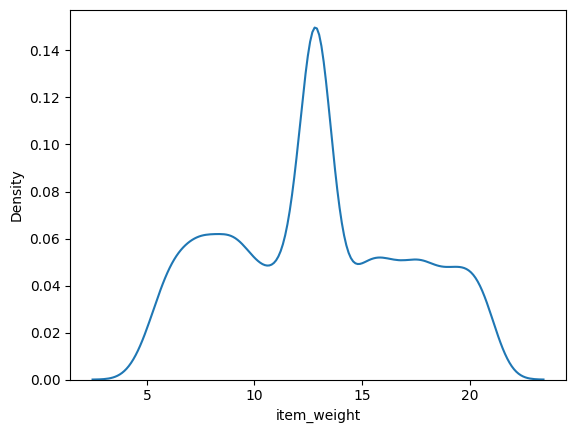

In [ ]:
sns.kdeplot(clean_data['item_weight'])